In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


loc_code = '01'
beta_quantiles = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv')
beta_quantiles.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0,0.095590,0.098991,0.101271,0.104533,0.106504,0.108982,0.111811,0.114228,0.116631,...,0.128777,0.131370,0.133648,0.137011,0.140045,0.142199,0.145521,0.150463,0.153244,0.157791
1,1,0.093416,0.095383,0.098617,0.102757,0.106094,0.109305,0.112274,0.114920,0.117002,...,0.130359,0.133042,0.135833,0.139047,0.141625,0.144548,0.148505,0.153214,0.159536,0.167356
2,2,0.093379,0.096360,0.098732,0.104094,0.108061,0.111185,0.114646,0.116900,0.120298,...,0.132313,0.134911,0.138547,0.141546,0.145335,0.148621,0.152823,0.157987,0.164263,0.170698
3,3,0.090493,0.092923,0.096196,0.100529,0.104152,0.107231,0.109864,0.112688,0.115141,...,0.129085,0.131682,0.135117,0.137931,0.140746,0.144799,0.149599,0.157811,0.165534,0.172909
4,4,0.087021,0.090553,0.094135,0.097360,0.101185,0.104069,0.106881,0.108678,0.111667,...,0.123369,0.125784,0.128412,0.131884,0.135083,0.139217,0.144726,0.154257,0.160733,0.165887


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv', delimiter=','
                                                                         '',
                  usecols=range(1,24), skiprows=1)
cleaned_data = np.delete(data, 0, 1)
print(cleaned_data)

[[0.09899089 0.10127115 0.10453321 ... 0.15046286 0.15324409 0.15779127]
 [0.09538331 0.09861673 0.10275727 ... 0.15321392 0.15953627 0.16735577]
 [0.09635995 0.09873156 0.10409356 ... 0.1579873  0.16426332 0.17069794]
 ...
 [0.04915411 0.05319668 0.05697508 ... 0.11792247 0.12852275 0.13895927]
 [0.04803107 0.05119698 0.05551227 ... 0.1124934  0.1183886  0.13028638]
 [0.04702132 0.04954987 0.05557524 ... 0.11320725 0.12049623 0.13244473]]


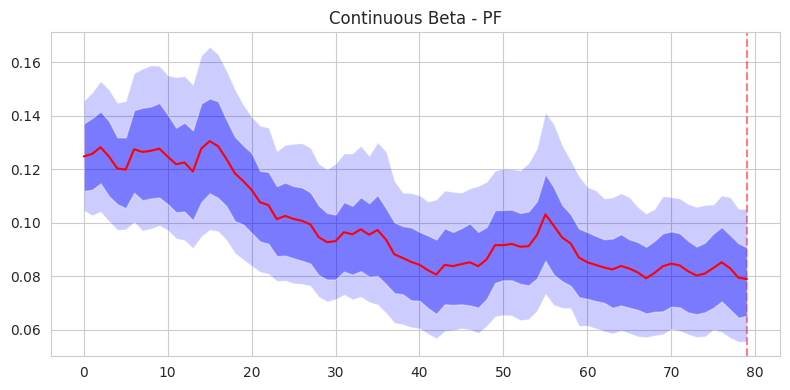

In [3]:
beta_quantiles = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_beta = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                       loc_code + '_average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)

plt.figure(figsize=(8,4))
plt.title("Continuous Beta - PF")
t=80

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[0:t,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[0:t,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.axvline(x = t - 1, color = 'red', linestyle = '--', alpha = 0.5,label = 
"forecast point")
plt.plot(pf_beta[0:t],color="red",zorder=12)
plt.tight_layout()
plt.savefig('Beta.png')
plt.show()

Now we need to add the forecasted beta values.

### Plotting a single trajectory

In [4]:
import pandas as pd
import numpy as np

trend_file = ('./pf_1000_data/datasets/beta_forecast_output/01/2024-04-06'
              '/out_logit-beta_trj_bootp.csv')
trend_trajectory = pd.read_csv(trend_file)
trend_trajectory = trend_trajectory.iloc[5].to_numpy()
np.delete(trend_trajectory, 1, 0)
print(trend_trajectory)

[0.08698612 0.08795348 0.08961988 0.08822631 0.08714102 0.08864545
 0.08751564 0.09690031 0.09351293 0.09211708 0.09265611 0.09687115
 0.0987403  0.10189304 0.09748496 0.09198474 0.0907719  0.09638463
 0.09608531 0.09548693 0.09621864 0.09697112 0.09643267 0.09755598
 0.10135616 0.10670062 0.10468018 0.10432551]


In [5]:
average_beta = []

for beta in pf_beta[0:t]:
    average_beta.append(beta[0])

average_beta = np.array(average_beta)
print(average_beta)

[0.12472656 0.12566638 0.12817081 0.12470421 0.12020897 0.11980705
 0.12739616 0.12639266 0.12681793 0.12763658 0.12466689 0.12179765
 0.1224734  0.1190771  0.12764055 0.13044358 0.12855576 0.12378711
 0.1184189  0.11550538 0.11222603 0.10758679 0.10650944 0.10127979
 0.10248943 0.10133034 0.10065039 0.09930225 0.09452067 0.09264726
 0.09306973 0.09639316 0.09560028 0.0974797  0.09545166 0.09720475
 0.09367057 0.08813863 0.08677651 0.08530128 0.08420525 0.08219078
 0.08055176 0.08418319 0.08370286 0.08448234 0.08514846 0.08368644
 0.08623868 0.09154259 0.09155907 0.09201336 0.09096975 0.09116891
 0.09537439 0.10308616 0.09879473 0.09440784 0.09222085 0.08688149
 0.08513661 0.08416134 0.08316992 0.082466   0.08377067 0.08280499
 0.08136837 0.07916018 0.08116696 0.08368711 0.08463685 0.08396771
 0.08178528 0.08019336 0.08095371 0.0830057  0.08515603 0.0829367
 0.07938645 0.07888515]


In [6]:
pf_beta_with_trajectory = np.concatenate([average_beta, trend_trajectory])
print(pf_beta_with_trajectory)

[0.12472656 0.12566638 0.12817081 0.12470421 0.12020897 0.11980705
 0.12739616 0.12639266 0.12681793 0.12763658 0.12466689 0.12179765
 0.1224734  0.1190771  0.12764055 0.13044358 0.12855576 0.12378711
 0.1184189  0.11550538 0.11222603 0.10758679 0.10650944 0.10127979
 0.10248943 0.10133034 0.10065039 0.09930225 0.09452067 0.09264726
 0.09306973 0.09639316 0.09560028 0.0974797  0.09545166 0.09720475
 0.09367057 0.08813863 0.08677651 0.08530128 0.08420525 0.08219078
 0.08055176 0.08418319 0.08370286 0.08448234 0.08514846 0.08368644
 0.08623868 0.09154259 0.09155907 0.09201336 0.09096975 0.09116891
 0.09537439 0.10308616 0.09879473 0.09440784 0.09222085 0.08688149
 0.08513661 0.08416134 0.08316992 0.082466   0.08377067 0.08280499
 0.08136837 0.07916018 0.08116696 0.08368711 0.08463685 0.08396771
 0.08178528 0.08019336 0.08095371 0.0830057  0.08515603 0.0829367
 0.07938645 0.07888515 0.08698612 0.08795348 0.08961988 0.08822631
 0.08714102 0.08864545 0.08751564 0.09690031 0.09351293 0.09211

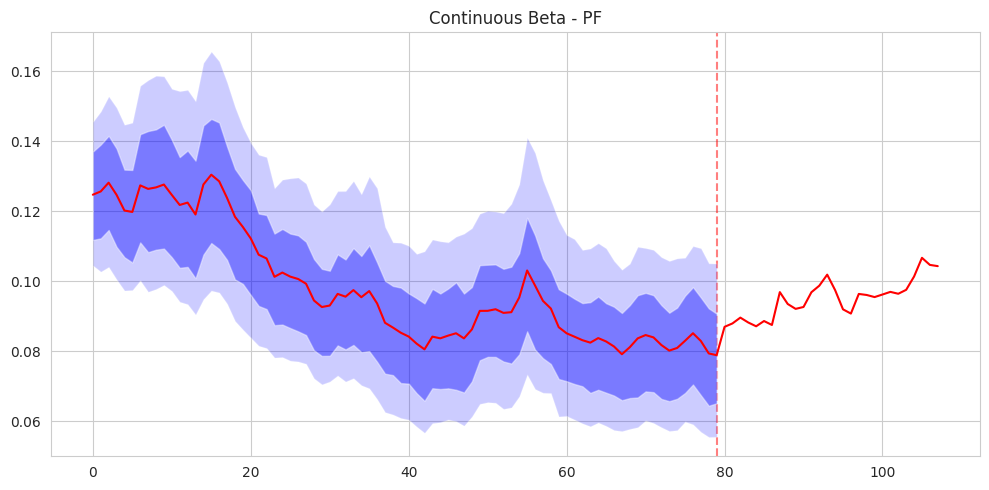

In [7]:
plt.figure(figsize=(10,5))
plt.title("Continuous Beta - PF")
t=80

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[0:t,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[0:t,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.axvline(x = t - 1, color = 'red', linestyle = '--', alpha = 0.5,label = 
"forecast point")
plt.plot(pf_beta_with_trajectory, color="red",zorder=12)
plt.tight_layout()
plt.savefig('Beta.png')
plt.show()

### Plotting Trajectory with Uncertainty

In [8]:
import pandas as pd
import numpy as np

trend_file = ('./pf_1000_data/datasets/beta_forecast_output/01/2024-04-06'
              '/out_logit-beta_trj_bootp.csv')
trend_trajectory = pd.read_csv(trend_file)
print(trend_trajectory.shape)

(1000, 28)


In [17]:
# Define quantile marks
QUANTILE_MARKS = 1.00 * np.array(
    [
        0.010,
        0.025,
        0.050,
        0.100,
        0.150,
        0.200,
        0.250,
        0.300,
        0.350,
        0.400,
        0.450,
        0.500,
        0.550,
        0.600,
        0.650,
        0.700,
        0.750,
        0.800,
        0.850,
        0.900,
        0.950,
        0.975,
        0.990,
    ]
)

# Calculate quantiles for each day
beta_forecast_quantiles = np.quantile(trend_trajectory, QUANTILE_MARKS, axis=0)
beta_forecast_quantiles = beta_forecast_quantiles.T

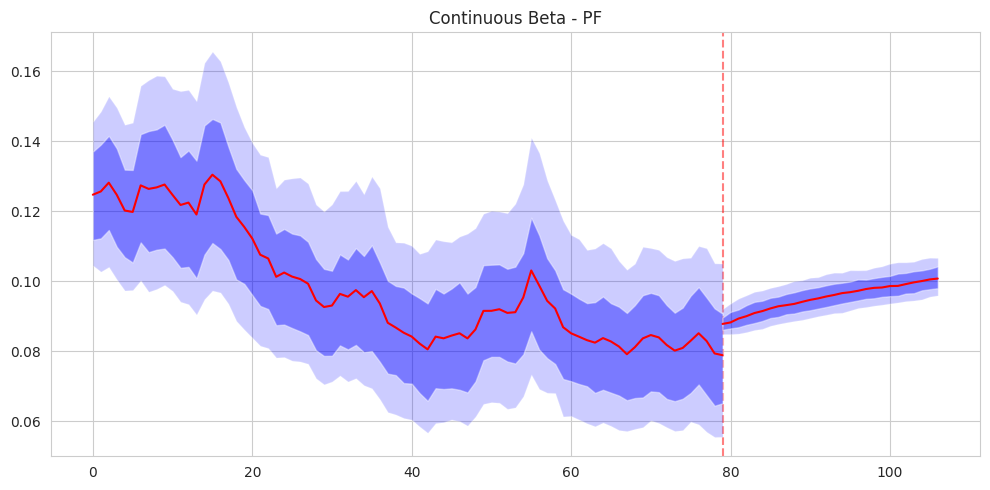

In [24]:
plt.figure(figsize=(10,5))
plt.title("Continuous Beta - PF")
t=80

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[0:t,
                                                      22-3], facecolor='blue', zorder=10, alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[0:t,
                                                      22-6], facecolor='blue', zorder=11, alpha = 0.4)

plt.axvline(x = t - 1, color = 'red', linestyle = '--', alpha = 0.5,label = 
"forecast point")
   
plt.fill_between(np.arange(t-1, t+27), beta_forecast_quantiles[:, 3], beta_forecast_quantiles[0:t, 22-3], facecolor='blue', zorder=10, alpha=0.2)
plt.fill_between(np.arange(t-1, t+27), beta_forecast_quantiles[:, 6], beta_forecast_quantiles[0:t, 22-6], facecolor='blue', zorder=11, alpha=0.4)

plt.plot(pf_beta[0:t],color="red",zorder=12)

# Plot median forecast in red
plt.plot(np.arange(t-1, t+27), beta_forecast_quantiles[:,11], color="red", zorder=100)

plt.tight_layout()
plt.savefig('Beta.png')
plt.show()

I believe that I am using mismatched data for PF and forecast due to how the current pipeline is running. Need to start saving all of the PF data for each data so I can plot any date for any location.